In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv(r'C:\Users\user\data\medical_examination.csv')

In [3]:
def calculate_overweight(row):
    bmi = row['weight'] / (row['height'] ** 2)
    if bmi > 25:
        return 1
    else:
        return 0
df['overweight'] = df.apply(calculate_overweight, axis=1)

In [19]:
df['cholesterol'] = df['cholesterol'].apply(lambda x: 0 if x == 1 else 1)
df['gluc'] = df['gluc'].apply(lambda x: 0 if x == 1 else 1)

In [27]:
def draw_cat_plot():
    df_cat = df.melt(id_vars='cardio',var_name='variable',value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active','overweight'])
    df_cat = df.melt(id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'])
    sns.catplot(data=df_cat, kind="count",  x="variable",hue="value", col="cardio").set_axis_labels("variable", "total")
    fig = sns.catplot(data=df_cat, kind="count",  x="variable",hue="value", col="cardio").set_axis_labels("variable", "total").fig

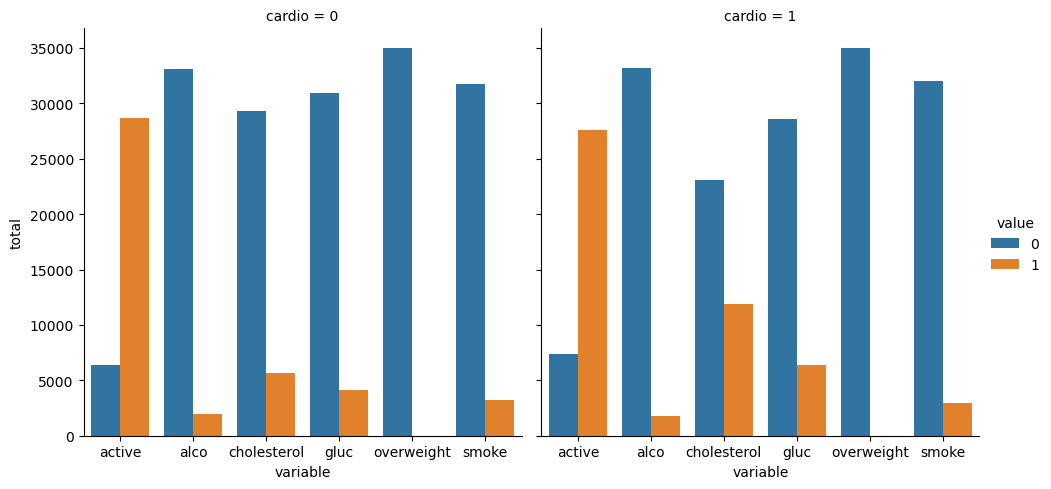

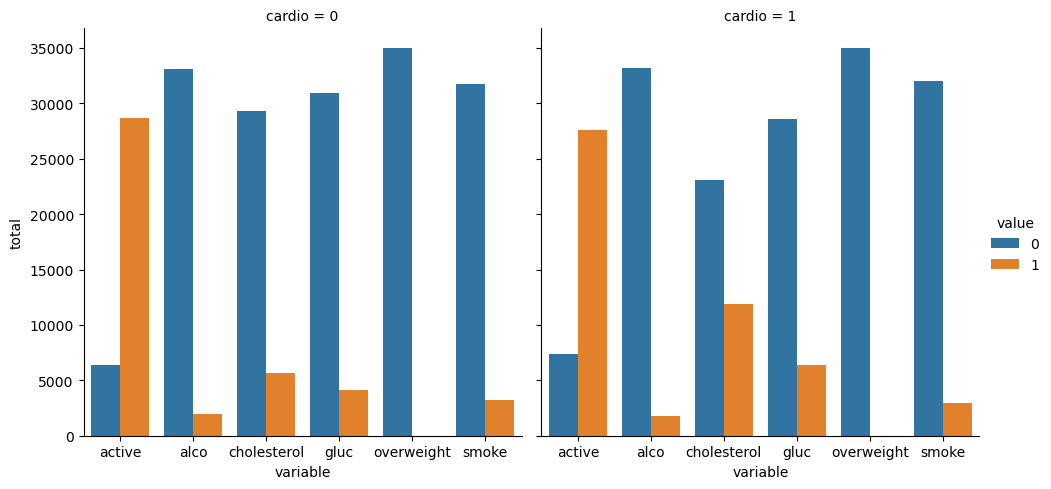

In [28]:
draw_cat_plot()

In [10]:
def draw_heat_map():
    df_heat = df.loc[df['ap_lo'] <= df['ap_hi']]
    df_heat = df_heat.loc[df['height'] >= df['height'].quantile(0.025)]
    df_heat = df_heat.loc[df['height'] <= df['height'].quantile(0.975)]
    df_heat = df_heat.loc[df['weight'] >= df['weight'].quantile(0.025)]
    df_heat = df_heat.loc[df['weight'] <= df['weight'].quantile(0.975)]
    
    corr = df_heat.corr()
    sns.heatmap(data=corr, annot=True)
    
    matrix_shape = corr.shape[0]
    upper_triangle_indices = np.triu_indices(matrix_shape, k=1)
    mask = np.zeros_like(corr)
    mask[upper_triangle_indices] = True
    
    fig, ax = plt.subplots(figsize = (9, 6))
    
    sns.heatmap(corr, annot = True,mask = mask, ax = ax)
    
    plt.show()

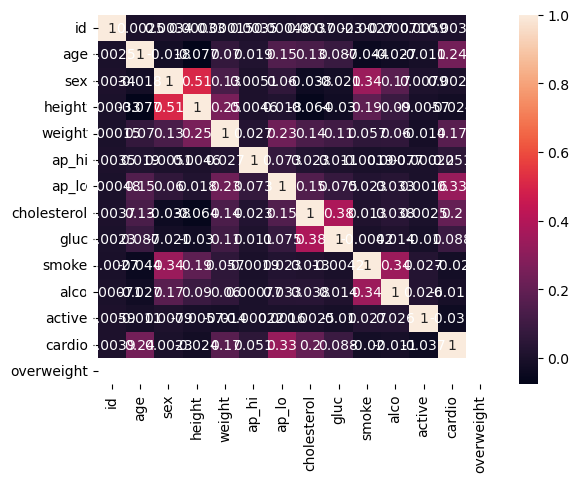

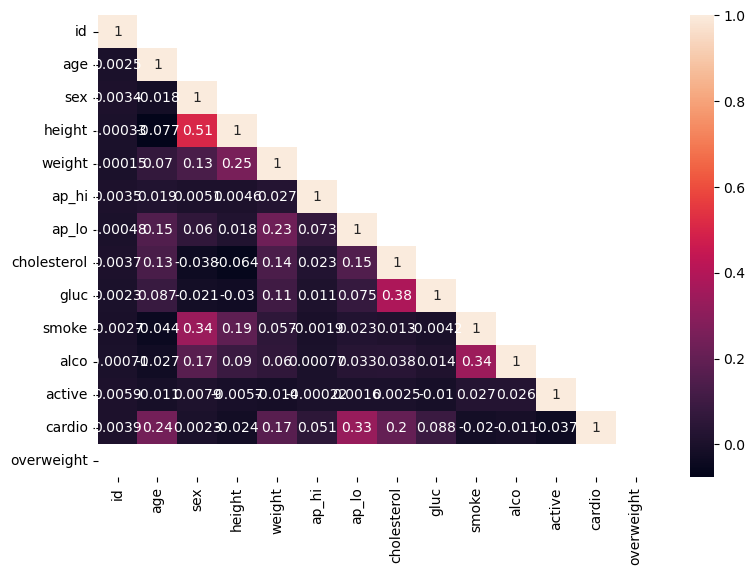

In [11]:
draw_heat_map()